CS571 : Assignment 8 (Logistic Regression)


Group Members Roll No.s : 2001CS35,2001CS56,2001CS70

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

In [2]:
train_data = pd.read_csv("./mnist_train.csv")
test_data = pd.read_csv("./mnist_test.csv")

In [3]:
x_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]

x_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

x_train/=255.0
x_test/=255.0


In [4]:
y_train_0=(y_train==0).astype(int)
y_train_1=(y_train==1).astype(int)
y_train_2=(y_train==2).astype(int)
y_train_3=(y_train==3).astype(int)
y_train_4=(y_train==4).astype(int)
y_train_5=(y_train==5).astype(int)
y_train_6=(y_train==6).astype(int)
y_train_7=(y_train==7).astype(int)
y_train_8=(y_train==8).astype(int)
y_train_9=(y_train==9).astype(int)


y_test_0=(y_test==0).astype(int)
y_test_1=(y_test==1).astype(int)
y_test_2=(y_test==2).astype(int)
y_test_3=(y_test==3).astype(int)
y_test_4=(y_test==4).astype(int)
y_test_5=(y_test==5).astype(int)
y_test_6=(y_test==6).astype(int)
y_test_7=(y_test==7).astype(int)
y_test_8=(y_test==8).astype(int)
y_test_9=(y_test==9).astype(int)




In [5]:
np.seterr(over='ignore')

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, num_features):
        self.weights = np.zeros(num_features)
        self.bias = 0

    def compute_cost(self, y, y_pred):
        m = len(y)
        cost = -(1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
        return cost

    def gradient_descent(self, X, y, y_pred):
        m = len(y)
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        return dw, db

    def train(self, X, y):
        m, n = X.shape
        self.initialize_parameters(n)

        for i in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            cost = self.compute_cost(y, y_pred)

            dw, db = self.gradient_descent(X, y, y_pred)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Print cost every 100 iterations
            # if i % 100 == 0:
            #     print(f"Iteration {i}, Cost: {cost}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred).astype(int),y_pred
    
    def get_model_parameters(self):
        return {
            'weights': self.weights,
            'bias': self.bias
        }
    




In [6]:
# # Suppress specific warning globally
# np.seterr(over='ignore')

# # Instantiate and train the model
# model_0 = LogisticRegression(learning_rate=0.01, num_iterations=1000)
# model_0.train(x_train, y_train_0)

In [7]:
# # Predict on the test set
# y_pred1,y_pred = model_0.predict(x_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test_0, y_pred1)
# print("Accuracy:", accuracy)


In [8]:
# Suppress specific warning globally
np.seterr(over='ignore')

models_list=[]
accuracy_list=[]
models_name_list=['model_0','model_1','model_2','model_3','model_4','model_5','model_6',
                 'model_7','model_8','model_9']

Y_train_list=[y_train_0,y_train_1,y_train_2,y_train_3,y_train_4,y_train_5,y_train_6,
             y_train_7,y_train_8,y_train_9]
Y_test_list = [y_test_0,y_test_1,y_test_2,y_test_3,y_test_4,y_test_5,y_test_6,y_test_7,
              y_test_8,y_test_9]

for i in range (10):
    print('Training of the model: ', models_name_list[i],', to recognize the digit: ',i)
    model = LogisticRegression(learning_rate=0.01, num_iterations=10000)
    model.train(x_train, Y_train_list[i])
    y_pred1,y_pred = model.predict(x_test)
    accuracy = accuracy_score(Y_test_list[i], y_pred1)
    print("Accuracy:", accuracy)
    accuracy_list.append(accuracy)
    models_list.append(model)


Training of the model:  model_0 , to recognize the digit:  0


Accuracy: 0.9912991299129913
Training of the model:  model_1 , to recognize the digit:  1
Accuracy: 0.9916991699169917
Training of the model:  model_2 , to recognize the digit:  2
Accuracy: 0.9764976497649765
Training of the model:  model_3 , to recognize the digit:  3
Accuracy: 0.972997299729973
Training of the model:  model_4 , to recognize the digit:  4
Accuracy: 0.9775977597759776
Training of the model:  model_5 , to recognize the digit:  5


KeyboardInterrupt: 

In [ ]:
# After training the models
for i, model in enumerate(models_list):
    parameters = model.get_model_parameters()
    print(f"Model {i} Parameters: {parameters}","\n")

Model 0 Parameters: {'weights': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.39681475e-06, -1.83242269e-05, -9.67778398e-06, -4.03240999e-07,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.95810271e-07, -2.16848146e-06, -2.92857497e-05, -7.29947421e-05,
       -1.42787435e-04, -2.22285009e-04, -3.83528272e-04, -3.85175926e-04,
       -3.02533002e-04, -3.82161574e-04, -6.15469683e-04, -5.24366823e-04,
       -5.40929327e-04, -4.29510094e-04, -2.77860428e-04, -2.03156756e-04,
       -1.51380178e-04, -5.35777865e-05, -2.11601026e-05, -6.3245613

In [ ]:
# Calculatin gthe average accuracy of all the models
ove_vs_all_accuracy=np.mean(accuracy_list)
print('The accuracy of the Onve-Vs-All model is:', ove_vs_all_accuracy)

The accuracy of the Onve-Vs-All model is: 0.9584358435843583


In [ ]:
# Creating a one-vs-all function that uses all the trained models to predict the label of a random image
def one_vs_all(data, models_list):
    pred_matrix = np.zeros((data.shape[0], 10))
    for i, model in enumerate(models_list):
        _, yhat_prob = model.predict(data)
        pred_matrix[:, i] = yhat_prob

    labels = np.argmax(pred_matrix, axis=1).astype(int)
    return labels


In [ ]:

pred_label = one_vs_all(x_test, models_list)
conf_matrix = confusion_matrix(y_test, pred_label)


In [ ]:
def plot_cm(mat,y_ture,ax,case):
    if case == 0:
        df_cm = pd.DataFrame(mat, columns=np.unique(y_ture), index = np.unique(y_ture))
        df_cm.index.name = 'True Label'
        df_cm.columns.name = 'Predicted Label'
        sb.heatmap(df_cm, cmap="Blues", cbar=False, annot=True,annot_kws={"size": 10}, ax=ax)
        plt.yticks(fontsize=10)
        plt.xticks(fontsize=10)
    else:
        l_lab=['Goalkeeper','Defender','Midfielder','Forward']
        df_cm = pd.DataFrame(mat, columns=np.array(l_lab), index = np.unique(l_lab))
        df_cm.index.name = 'True Label'
        df_cm.columns.name = 'Predicted Label'
        sb.heatmap(df_cm, cmap="Blues", cbar=False, annot=True,annot_kws={"size": 10}, ax=ax)
        plt.yticks(fontsize=10)
        plt.xticks(fontsize=10)

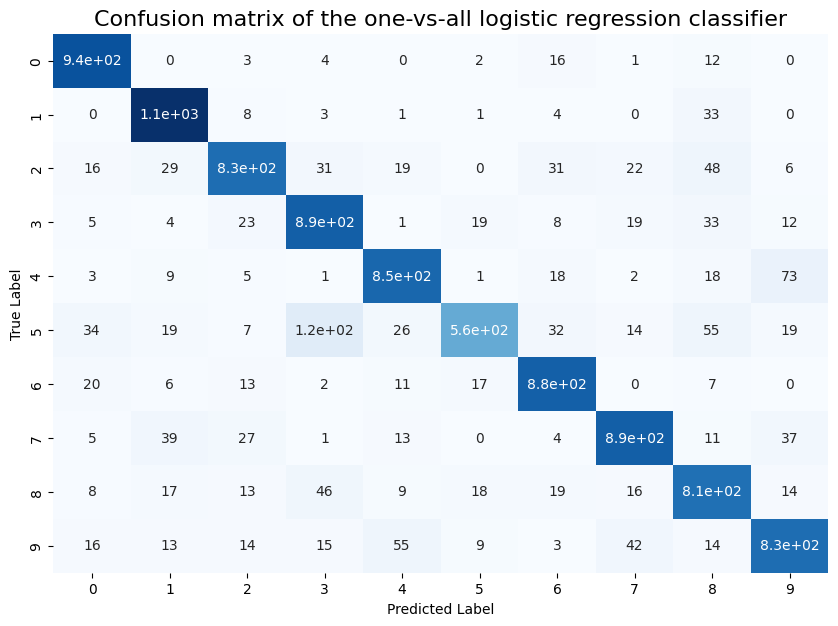

In [ ]:
plt.figure(figsize=(10,7))
ax1 = plt.subplot(111)
plt.title('Confusion matrix of the one-vs-all logistic regression classifier', fontsize=16)
plot_cm(conf_matrix, y_test, ax1,0)